In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import classification_report,ConfusionMatrixDisplay,roc_auc_score
from sklearn.preprocessing import StandardScaler

#### Import the Data

In [2]:
file='../Social_Network_Ads.csv'
data=pd.read_csv(file)
print(data.dtypes,'\n\nShape ->',data.shape)
data.head()

Age                int64
EstimatedSalary    int64
Purchased          int64
dtype: object 

Shape -> (400, 3)


,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


#### Preprocessing

In [3]:
# No missings Observed
data.isna().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [4]:
(data['Purchased'].value_counts(normalize=True) * 100).round().astype(int).astype(str) + ' %'
# Inbalanced Data-set

0    64 %
1    36 %
Name: Purchased, dtype: object

#### Splitting the data

In [5]:
inputs=data.drop('Purchased',axis=1)
target=data['Purchased']
# reshaping target
target=np.array(target).reshape(len(data),1)
x_train,x_test,y_train,y_test=tts(inputs,target,random_state=42,stratify=target,test_size=0.2)

#### Scaling the features

In [6]:
standardscaler=StandardScaler().fit(x_train)
x_train=standardscaler.transform(x_train)
x_test=standardscaler.transform(x_test)

#### Logistic Regression

In [7]:
# Fitting logistic regression
log_reg=LogisticRegression().fit(x_train,y_train)
y_pred=log_reg.predict(x_test)

c:\Users\mmopa\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<Figure size 640x480 with 0 Axes>

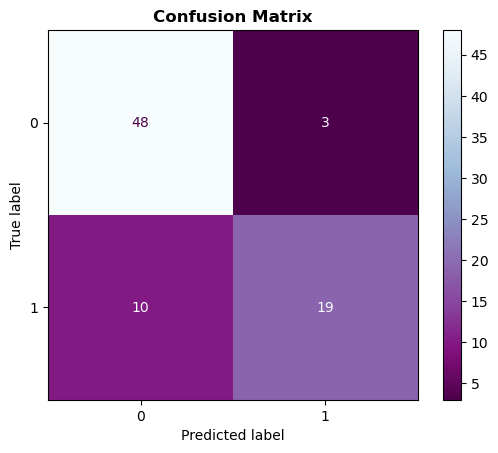

In [8]:
# Model Evaluation
sns.reset_defaults()
plt.figure()
ConfusionMatrixDisplay.from_predictions(y_test,y_pred,cmap='BuPu_r')
plt.title('Confusion Matrix',fontweight='bold')
plt.show()

In [9]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.94      0.88        51
           1       0.86      0.66      0.75        29

    accuracy                           0.84        80
   macro avg       0.85      0.80      0.81        80
weighted avg       0.84      0.84      0.83        80



In [10]:
print('roc-score:',roc_auc_score(y_test,y_pred))

roc-score: 0.7981744421906694


#### Visualizing the Decision Boundary

In [11]:
theta0=log_reg.intercept_[0]
theta1=log_reg.coef_[0][0]
theta2=log_reg.coef_[0][1]
x1=np.linspace(-1.5,2,100)
x2 = (-theta0 / theta2) - (theta1 / theta2) * x1

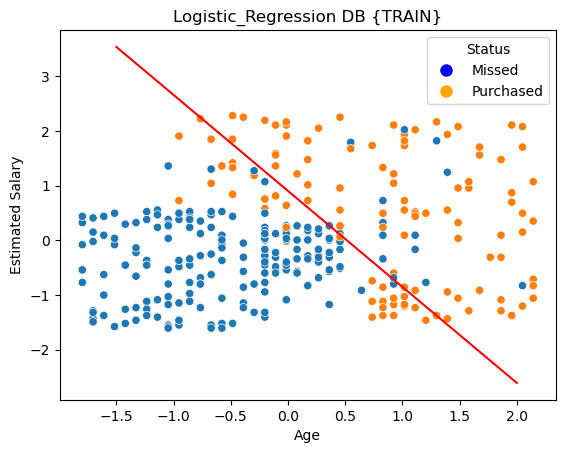

In [12]:
# Define custom labels and colors
hue_labels = {0: 'Missed', 1: 'Purchased'}
hue_colors = {0: 'blue', 1: 'orange'}
plt.figure()
combine=np.concatenate([x_train,y_train],axis=1)
sns.scatterplot(data=combine,x=combine[:,0],y=combine[:,1], hue=combine[:,2].astype(int), hue_order=[0, 1])
plt.plot(x1, x2, color='red')  # Plot the decision boundary
#plt.legend(['Missed','Purchased'])
# Create a custom legend
# Add labels
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label=hue_labels[key], markerfacecolor=hue_colors[key], markersize=10) for key in hue_labels.keys()]
plt.legend(handles=legend_elements, title='Status', labels=hue_labels.values())
plt.title('Logistic_Regression DB {TRAIN}')
plt.show()

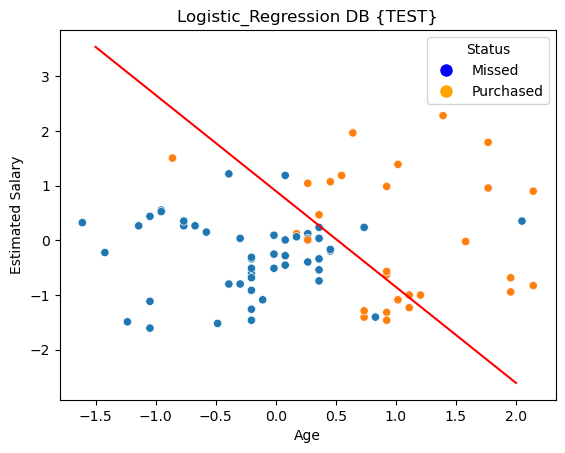

In [13]:
# Define custom labels and colors
hue_labels = {0: 'Missed', 1: 'Purchased'}
hue_colors = {0: 'blue', 1: 'orange'}
plt.figure()
combine=np.concatenate([x_test,y_test],axis=1)
sns.scatterplot(data=combine,x=combine[:,0],y=combine[:,1], hue=combine[:,2].astype(int), hue_order=[0, 1])
plt.plot(x1, x2, color='red')  # Plot the decision boundary
#plt.legend(['Missed','Purchased'])
# Create a custom legend
# Add labels
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label=hue_labels[key], markerfacecolor=hue_colors[key], markersize=10) for key in hue_labels.keys()]
plt.legend(handles=legend_elements, title='Status', labels=hue_labels.values())
plt.title('Logistic_Regression DB {TEST}')
plt.show()